In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### **Get the data**

In [2]:
fraud_data= pd.read_csv('Data/ecommerce_data.csv')
ip_country=pd.read_csv('Data/IpAddress_to_Country.csv')

In [3]:
# Define a function to draw a bar chart of a specific feature in data
def barchart(feature):
    frau=fraud_data[fraud_data['class']==1][feature].value_counts()
    df=pd.DataFrame([frau])
    df.index=['frau']
    df.plot(kind='bar')

In [4]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,24-02-2015 22:55,18-04-2015 02:47,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,07-06-2015 20:39,08-06-2015 01:38,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,01-01-2015 18:52,01-01-2015 18:52,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,28-04-2015 21:13,04-05-2015 13:54,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,21-07-2015 07:09,09-09-2015 18:40,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


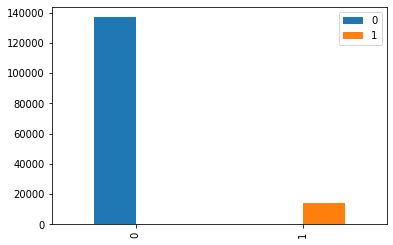

In [5]:
# plot the number of two kinds of class so that we can see this data is imbalance
fraud=fraud_data[fraud_data['class']==1]['class'].value_counts()
not_fraud=fraud_data[fraud_data['class']==0]['class'].value_counts()
df=pd.DataFrame([ not_fraud, fraud])
df.index=['0','1']
df.plot(kind='bar')

### Time Processing


_ First, convert all the cells in colums 'purchase_time' and 'signup_time' into time series so that we can easily process this fearure

_ Minus two columns and pass it to columns ' difference' because, the transactions which are fraud usually have the small difference between  'purchase_time'  and  'signup_time'

_ Get the specific day of week base on ' 'purchase_time'

_ Encode the categorical values into numerical values

In [6]:
# Convert to date time type
fraud_data['purchase_time']=pd.to_datetime(fraud_data['purchase_time'], errors='coerce')
fraud_data['signup_time']=pd.to_datetime(fraud_data['signup_time'], errors='coerce')
fraud_data['difference']=fraud_data['purchase_time']-fraud_data['signup_time']
fraud_data['difference']=fraud_data['difference'].astype('timedelta64[m]')

In [7]:
# Only get the hours from singup time and purchase time
fraud_data['signup_hour']=fraud_data['signup_time'].dt.hour
fraud_data['purchase_hour']=fraud_data['purchase_time'].dt.hour

In [8]:
# Get the day of week
fraud_data['purchase_dayofweek']=fraud_data['purchase_time'].dt.strftime('%A')

In [9]:
#Encode the categorical values into numerical values
fraud_data['purchase_dayofweek'], key_dayofweek=fraud_data['purchase_dayofweek'].factorize(sort=True)

### User_id and Device_id

_ Encode 'device_id' to numerical value

_ Define two new colums 'usage_device_count' and 'usage_ip_count' which are the counts  device used and ip used

In [10]:
# Endcode this fearture
fraud_data['device_id'], key_device=fraud_data['device_id'].factorize(sort=True)

#Define two new columns
u, indices, counts=np.unique(fraud_data['device_id'], return_inverse=True, return_counts=True)
fraud_data['usage_device_count']= counts[indices]
u, indices, counts=np.unique(fraud_data['ip_address'], return_inverse=True, return_counts=True)
fraud_data['usage_ip_count']= counts[indices]

### Sex

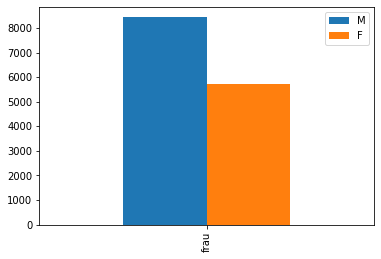

In [11]:
barchart('sex')

In [12]:
#Encode this fearture
fraud_data['sex'], key_sex=fraud_data['sex'].factorize(sort=True)

### Source

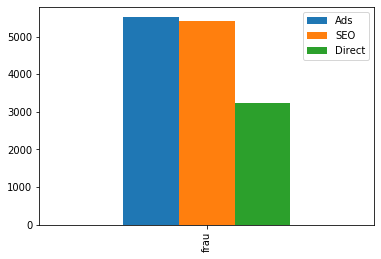

In [13]:
barchart('source')

In [14]:
#Encode this fearture
fraud_data['source'], key_source=fraud_data['source'].factorize(sort=True)

### Brower

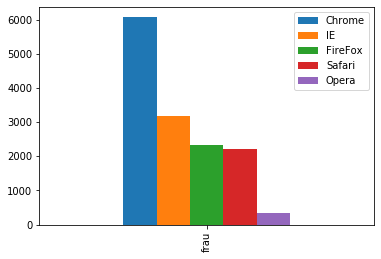

In [15]:
barchart('browser')

In [16]:
#Encode this fearture
fraud_data['browser'], key_browser=fraud_data['browser'].factorize(sort=True)

###  IP Adress

_ First we find the country of every single ip address by mapping the ip into the 'ip_country' dataframe 

_ Encode the country columns to numerical number

In [17]:
# Function to map
def map_ip_address(i):
    result=ip_country[(ip_country['lower_bound_ip_address'].le(i))&
                     (ip_country['upper_bound_ip_address'].ge(i))]['country'].values
    if result.shape[0] >0:
        return result[0]
    else:
        return np.NaN

In [18]:
# Mapping
fraud_data['country']=fraud_data['ip_address'].map(map_ip_address)

In [19]:
#Encode
fraud_data['country'], key=fraud_data['country'].factorize(sort=True)

### Correlation

_ See the correlation betweem every singel feature to each other

In [20]:
import seaborn as sns

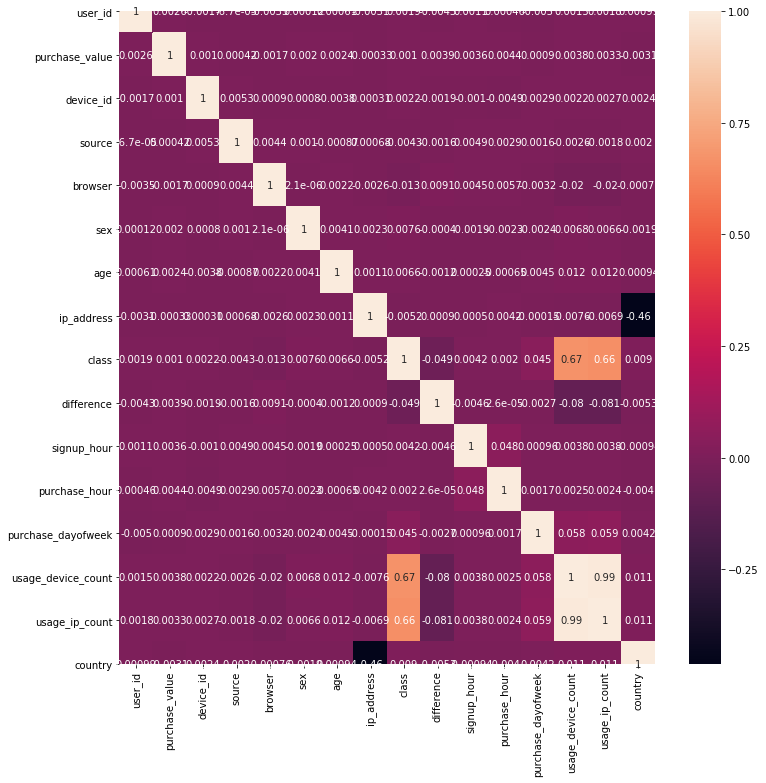

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(fraud_data.corr(),annot=True)

In [22]:
# Drop the feautures which are not neccessary
#fraud_data=fraud_data.drop(['user_id','signup_time','purchase_time'], axis=1)

In [23]:
# After processing, the data looks like this
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,difference,signup_hour,purchase_hour,purchase_dayofweek,usage_device_count,usage_ip_count,country
0,22058,2015-02-24 22:55:00,2015-04-18 02:47:00,34,89215,2,0,1,39,7.327584e+08,0,75112.0,22,2,2,1,1,84
1,333320,2015-07-06 20:39:00,2015-08-06 01:38:00,16,24078,0,0,0,53,3.503114e+08,0,43499.0,20,1,4,1,1,171
2,1359,2015-01-01 18:52:00,2015-01-01 18:52:00,15,131216,2,3,1,53,2.621474e+09,1,0.0,18,18,4,12,12,171
3,150084,2015-04-28 21:13:00,2015-04-05 13:54:00,44,3977,2,4,1,41,3.840542e+09,0,-33559.0,21,13,3,1,1,-1
4,221365,2015-07-21 07:09:00,2015-09-09 18:40:00,39,68757,0,4,1,45,4.155831e+08,0,72691.0,7,18,6,1,1,171


In [24]:
fraud_data.to_csv('Data/data_after_process.csv')

# **Training data**

### **Split Data**

In [25]:
#Split data
from sklearn.model_selection import train_test_split

X=fraud_data.drop(['class'], axis=1)
X['signup_time'] = pd.to_datetime(X['signup_time'],infer_datetime_format=True)
X['signup_time']=X['signup_time'].apply(lambda x: x.toordinal())
X['purchase_time'] = pd.to_datetime(X['purchase_time'],infer_datetime_format=True)
X['purchase_time']=X['purchase_time'].apply(lambda x: x.toordinal())
y=fraud_data['class']
X_train,X_test, y_train,y_test= train_test_split(X,y, test_size=0.3)

### **Train data**

In [26]:
# Fit the data using 3 machine learning model K neigbour, Random Forest and Decision Tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 

knn_clf=KNeighborsClassifier(n_neighbors=5,algorithm='ball_tree', weights='distance')
knn_clf.fit(X_train, y_train)




rf_clf=RandomForestClassifier(class_weight='balanced')
rf_clf.fit(X_train, y_train)


dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
# Evaluate every algorithms to find out the best one
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=10,shuffle=True, random_state=0)

In [28]:
# This is the best one which has the best results
# The only thing we need to take care is : This is the imbalance data, so we can not use the normal metric to evaluate
# We use 'roc_auc' to evaluate the model
rf_clf=RandomForestClassifier(class_weight='balanced')
score=cross_val_score(rf_clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring='roc_auc')
rf_clf.fit(X_train, y_train)
print(np.mean(score)*100,2)

84.87010015540417 2


In [29]:
knn_clf=KNeighborsClassifier(n_neighbors=5,algorithm='ball_tree', weights='distance')
score=cross_val_score(knn_clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring='roc_auc')
knn_clf.fit(X_train, y_train)
print(np.mean(score)*100,2)


76.33237953961978 2


In [30]:
dt_clf=DecisionTreeClassifier()
score=cross_val_score(dt_clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring='roc_auc')
dt_clf.fit(X_train, y_train)
print(np.mean(score)*100,2)

77.30616488951338 2


In [31]:
# Find the auc of every model and plot it
from sklearn.metrics import roc_curve, auc


y_pred_rf=rf_clf.predict(X_test)
y_pred_prob_rf=rf_clf.predict_proba(X_test)
fpr_rf, tpr_rf, thresholds_rf= roc_curve(y_test, y_pred_prob_rf[:,1])
auc_rf=auc(fpr_rf, tpr_rf)

y_pred_knn=knn_clf.predict(X_test)
y_pred_prob_knn=knn_clf.predict_proba(X_test)
fpr_knn, tpr_knn, thresholds_knn= roc_curve(y_test, y_pred_prob_knn[:,1])
auc_knn=auc(fpr_knn, tpr_knn)

y_pred_dt=dt_clf.predict(X_test)
y_pred_prob_dt=dt_clf.predict_proba(X_test)
fpr_dt, tpr_dt, thresholds_dt= roc_curve(y_test, y_pred_prob_dt[:,1])
auc_dt=auc(fpr_dt, tpr_dt)


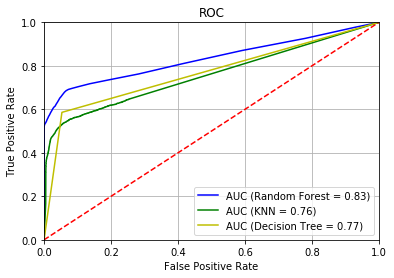

In [32]:
# Plot the ROC of each model, we also see the ROC is the best model from the graph
plt.title('ROC')
plt.plot(fpr_rf, tpr_rf,'b', label='AUC (Random Forest = %0.2f)' % auc_rf)
plt.plot(fpr_knn, tpr_knn,'g', label='AUC (KNN = %0.2f)' % auc_knn)
plt.plot(fpr_dt, tpr_dt,'y', label='AUC (Decision Tree = %0.2f)' % auc_dt)
plt.legend()
plt.grid()
plt.plot([0.0, 1.0],[0.0, 1.0],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [33]:
y_pred_rfs=rf_clf.predict(X_test[0:15])
print(y_pred_rfs)
print(X_test[0:7])
if y_pred_rfs.all() == 0:
    print("normal user")
else:
    print("fraud user")

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
        user_id  signup_time  purchase_time  purchase_value  device_id  \
149071    43870       735603         735828              33     135278   
130553    11706       735873         735601              31     107835   
146064    21283       735815         735770              71       1580   
20175    325522       735712         735831              66      25280   
28830    232710       735935         735662              81     109299   
84073    338425       735644         735703              19      99922   
48485    105939       735635         735810              50      26083   

        source  browser  sex  age    ip_address  difference  signup_hour  \
149071       0        4    1   53  1.559805e+09    322913.0           22   
130553       0        4    1   23  1.271035e+09   -391743.0           18   
146064       0        4    0   41  1.276976e+09    -64770.0            8   
20175        0        3    0   33  3.055760e+09    172532.0            

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc
LRmodel = LogisticRegression(solver='lbfgs')
LRmodel.fit(X_train, y_train)
loacc=LRmodel.score(X_test, y_test)
preds = LRmodel.predict(X_test)
print(loacc) 
print(classification_report(y_test, preds))

0.9055455066837252
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     41052
           1       0.00      0.00      0.00      4282

    accuracy                           0.91     45334
   macro avg       0.45      0.50      0.48     45334
weighted avg       0.82      0.91      0.86     45334



C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, roc_curve, auc
    #create a dictionary of base learners
estimators=[('rfc', rf_clf), ('LR', LRmodel)]
    #create voting classifier
majority_voting = VotingClassifier(estimators, voting='soft')

    #fit model to training data
majority_voting.fit(X_train, y_train)
    #test our model on the test data
vacc=majority_voting.score(X_test, y_test)
preds = majority_voting.predict(X_test)
print(vacc)    
print(classification_report(y_test, preds))

0.9549565447566948
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41052
           1       1.00      0.52      0.69      4282

    accuracy                           0.95     45334
   macro avg       0.98      0.76      0.83     45334
weighted avg       0.96      0.95      0.95     45334



In [36]:
from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
loacc=model.score(X_test, y_test)
preds = model.predict(X_test)
print(loacc) 
print(classification_report(y_test, preds))

C:\Users\dell\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:59:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9535006838134733
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     41052
           1       0.96      0.53      0.68      4282

    accuracy                           0.95     45334
   macro avg       0.96      0.76      0.83     45334
weighted avg       0.95      0.95      0.95     45334

